<a href="https://colab.research.google.com/github/benjaminmugangu/TP1_IA/blob/main/TP_PRETRAITEMENT_DATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OPÉRATION 1 : NETTOYAGE DES DONNÉES

## Détection des valeurs manquantes

In [ ]:
# Import des librairies
import pandas as pd

# Charger le dataset depuis ton fichier
df = pd.read_csv('/home/TP2_IA/test_energy_data.csv')

# Afficher les premières lignes pour visualiser
df.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59


## Vérification des valeurs manquantes

In [ ]:
# Vérification des valeurs manquantes
print("Nombre de valeurs manquantes par colonne :")
print(df.isnull().sum())

Nombre de valeurs manquantes par colonne :
Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64


## Traitement des valeurs manquantes

In [ ]:
import pandas as pd

# ... (Votre code existant pour charger le DataFrame) ...

# Sélectionner les colonnes numériques
numeric_cols = df.select_dtypes(include=['number']).columns

# Remplacer les valeurs manquantes dans les colonnes numériques par leur moyenne
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

## 1.2 SUPPRESSION DES DOUBLONS OU ERREURS

In [ ]:
# Vérifie combien de lignes sont en double
print("Nombre de doublons :", df.duplicated().sum())

Nombre de doublons : 0


## Suppression des doublons

In [ ]:
# Supprimer les doublons si présents
df.drop_duplicates(inplace=True)

# OPERTION 2 TRANSFORMATION DES DONNÉES

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Supposons que ton DataFrame est déjà chargé et nettoyé (df)

# On sélectionne uniquement les colonnes numériques
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df_num = df[numerical_columns]

df_num.head()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
0,24563,15,4,28.52,2865.57
1,27583,56,23,23.07,4283.80
2,45313,4,44,33.56,5067.83
3,41625,84,17,27.39,4624.30
4,36720,58,47,17.08,4820.59


## Normalisation (MinMaxScaler)

In [ ]:
# Importer et appliquer la normalisation
scaler_minmax = MinMaxScaler()
df_normalized = pd.DataFrame(scaler_minmax.fit_transform(df_num), columns=numerical_columns)

# Affichage des données normalisées
df_normalized.head()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
0,0.485589,0.134021,0.062500,0.745372,0.139165
1,0.548254,0.556701,0.458333,0.521185,0.523447
2,0.916150,0.020619,0.895833,0.952694,0.735888
3,0.839624,0.845361,0.333333,0.698889,0.615709
4,0.737846,0.577320,0.958333,0.274784,0.668896


## Standardisation (StandardScaler)

In [ ]:
# Importer et appliquer la standardisation
scaler_standard = StandardScaler()
df_standardized = pd.DataFrame(scaler_standard.fit_transform(df_num), columns=numerical_columns)

# Affichage des données standardisées
df_standardized.head()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
0,-0.096678,-1.083157,-1.621433,0.935524,-1.595883
1,0.124691,0.294734,-0.280239,0.148301,0.116156
2,1.424321,-1.452835,1.202134,1.663524,1.062610
3,1.153986,1.235733,-0.703774,0.772301,0.527196
4,0.794444,0.361948,1.413901,-0.716921,0.764150


## Comparaison visuelle

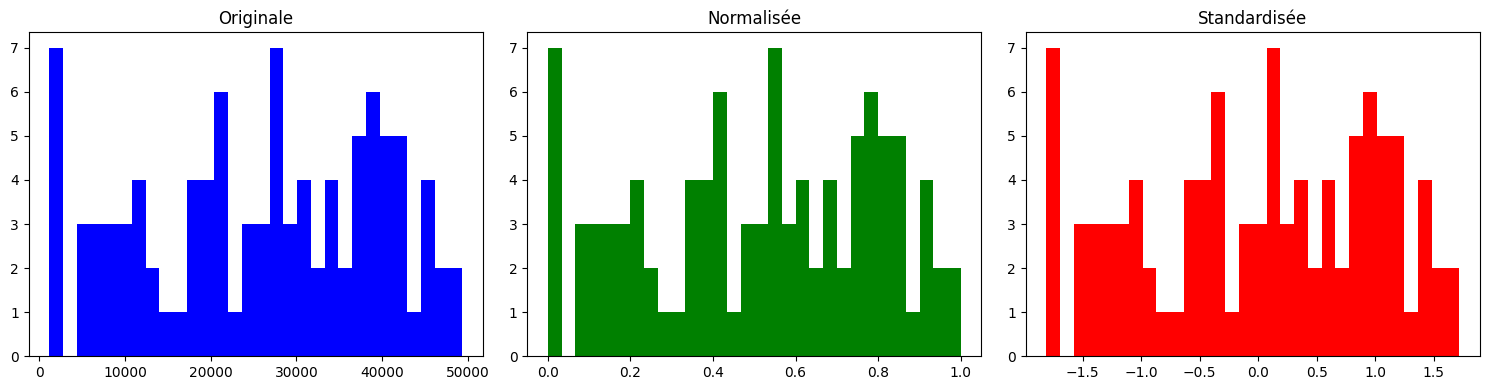

In [ ]:
import matplotlib.pyplot as plt

# Exemple sur une colonne
col = numerical_columns[0]

plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.hist(df_num[col], bins=30, color='blue')
plt.title("Originale")

plt.subplot(1, 3, 2)
plt.hist(df_normalized[col], bins=30, color='green')
plt.title("Normalisée")

plt.subplot(1, 3, 3)
plt.hist(df_standardized[col], bins=30, color='red')
plt.title("Standardisée")

plt.tight_layout()
plt.show()


#OPERATION 3. ENCODAGE DES VARIABLES CATEGORIELLES

## Identifier les variables catégorielles

In [ ]:
# On filtre les colonnes de type object (catégorielles)
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)


Index(['Building Type', 'Day of Week'], dtype='object')


## Encodage par étiquettes (Label Encoding)

In [ ]:
# Import des librairies
import pandas as pd
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# Charger le dataset depuis ton fichier
df = pd.read_csv('/home/TP2_IA/test_energy_data.csv')

# ... (Reste de ton code) ...

label_encoder = LabelEncoder()

# Exemple sur une colonne catégorielle
df['Categorie_Label'] = label_encoder.fit_transform(df['Building Type'])

# ...

## Encodage One-Hot (OneHotEncoding)

In [ ]:
df_onehot = pd.get_dummies(df, columns=['Building Type'], drop_first=True)


## Encodage Ordinal (OrdinalEncoder)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

categories = [['Commercial', 'Residential', 'Industrial']] # Include all unique values
encoder = OrdinalEncoder(categories=categories)

df['Categorie_Ordinale'] = encoder.fit_transform(df[['Building Type']])

# OPERATION 4 MISE A L'ECHELLE DES CARACTERISTIQUES

## Sélection des colonnes numériques à mettre à l’échelle

In [ ]:
# On sélectionne uniquement les colonnes numériques (int, float)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df[numeric_cols]
print(numeric_cols)


Index(['Square Footage', 'Number of Occupants', 'Appliances Used',
       'Average Temperature', 'Energy Consumption', 'Categorie_Label',
       'Categorie_Ordinale'],
      dtype='object')


## MinMaxScaler

In [ ]:
minmax_scaler = MinMaxScaler()
df_minmax_scaled = pd.DataFrame(minmax_scaler.fit_transform(df_numeric), columns=numeric_cols)


## StandardScaler

In [ ]:
standard_scaler = StandardScaler()
df_standard_scaled = pd.DataFrame(standard_scaler.fit_transform(df_numeric), columns=numeric_cols)


## RobustScaler

In [ ]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()
df_robust_scaled = pd.DataFrame(robust_scaler.fit_transform(df_numeric), columns=numeric_cols)

## Exemple d'affichage comparatif

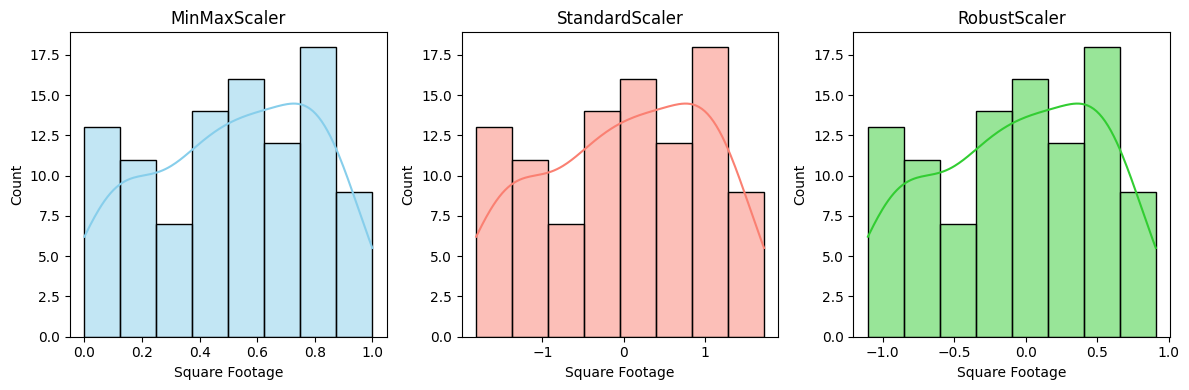

In [ ]:
# Visualisation des échelles après transformation
import matplotlib.pyplot as plt
import seaborn as sns

# Plot une colonne transformée avec les 3 scalers
col = numeric_cols[0]  # par exemple, la première colonne numérique
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(df_minmax_scaled[col], kde=True, color='skyblue')
plt.title('MinMaxScaler')

plt.subplot(1, 3, 2)
sns.histplot(df_standard_scaled[col], kde=True, color='salmon')
plt.title('StandardScaler')

plt.subplot(1, 3, 3)
sns.histplot(df_robust_scaled[col], kde=True, color='limegreen')
plt.title('RobustScaler')

plt.tight_layout()
plt.show()


# OPERATION 5 REDUCTION DE DIMENSIONS

# Méthodes principales de sélection de caractéristiques
#⚙ 1. Sélection par variance (Variance Threshold)

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Par défaut, supprime les features avec variance == 0
selector = VarianceThreshold(threshold=0.01)  # tu peux ajuster le seuil
df_variance = selector.fit_transform(df_numeric)

# Récupérer les colonnes conservées
columns_selected = df_numeric.columns[selector.get_support()]
df_variance = pd.DataFrame(df_variance, columns=columns_selected)
print(columns_selected)


Index(['Square Footage', 'Number of Occupants', 'Appliances Used',
       'Average Temperature', 'Energy Consumption', 'Categorie_Label',
       'Categorie_Ordinale'],
      dtype='object')


# Sélection univariée (SelectKBest)

Index(['Square Footage', 'Number of Occupants', 'Appliances Used',
       'Average Temperature', 'Energy Consumption', 'Categorie_Label',
       'Categorie_Ordinale'],
      dtype='object')


In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression

# Exemple : imaginons une variable cible "y"
df = pd.read_csv('/home/TP2_IA/test_energy_data.csv', delimiter=',')  # Adjust delimiter if needed
y = df['Energy Consumption']  # Using 'Energy Consumption' as target

# Sélection des 5 meilleures features
selector = SelectKBest(score_func=f_regression, k=5)
# En supposant que df est votre DataFrame original
X = df.select_dtypes(include=['number']).drop(columns=['Energy Consumption'], errors='ignore')
X_selected = selector.fit_transform(X, y)

# Créer y (cible)
y = df['Energy Consumption']

# Appliquer SelectKBest
selector = SelectKBest(score_func=f_regression, k=2)
X_selected = selector.fit_transform(X, y)

# Noms des colonnes sélectionnées
cols_selected = X.columns[selector.get_support()]
df_selectk = pd.DataFrame(X_selected, columns=cols_selected)
print(cols_selected)


Index(['Square Footage', 'Number of Occupants'], dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=5 is greater than n_features=4. All the features will be returned.
  warnings.warn(


## Sélection par importance des arbres (RandomForest)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Importance des features
importances = model.feature_importances_
important_features = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Top 5
print(important_features.head(5))


Square Footage         0.657866
Number of Occupants    0.173777
Appliances Used        0.109984
Average Temperature    0.058373
dtype: float64


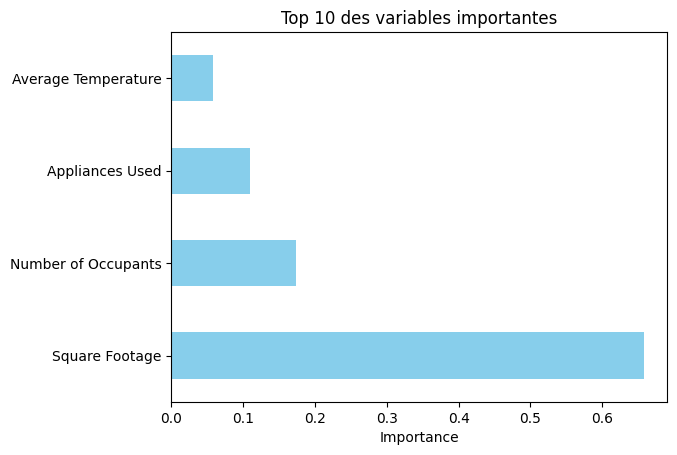

In [ ]:
import matplotlib.pyplot as plt

important_features.head(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 des variables importantes")
plt.xlabel("Importance")
plt.show()


# OPERATION 6 DETECTION ET SUPPRESSION DES VALEURS ABERRANTES

In [ ]:
# Exemple sur toutes les colonnes numériques
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Filtrage
df_iqr = df_numeric[~((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f"Lignes restantes après suppression des outliers : {df_iqr.shape[0]}")


Lignes restantes après suppression des outliers : 100


## Méthode de l’écart-type

In [ ]:
import numpy as np  # Importer NumPy

mean = df_numeric.mean()
std = df_numeric.std()

df_std = df_numeric[(np.abs(df_numeric - mean) <= (3 * std)).all(axis=1)]
print(f"Lignes restantes après détection par écart-type : {df_std.shape[0]}")

Lignes restantes après détection par écart-type : 100


## Isolation Forest (détection multivariée)

In [ ]:
from sklearn.ensemble import IsolationForest

isf = IsolationForest(contamination=0.01, random_state=42)  # 1% supposé être outliers
df_numeric['outlier'] = isf.fit_predict(df_numeric)

# -1 = outlier, 1 = normal
df_iforest = df_numeric[df_numeric['outlier'] == 1].drop(columns='outlier')
print(f"Lignes normales conservées : {df_iforest.shape[0]}")


Lignes normales conservées : 99


## Méthode avec Local Outlier Factor (LOF)

In [ ]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
outliers = lof.fit_predict(df_numeric)

df_lof = df_numeric[outliers == 1]
print(f"Lignes normales avec LOF : {df_lof.shape[0]}")


Lignes normales avec LOF : 99


## Visualisation simple des outliers

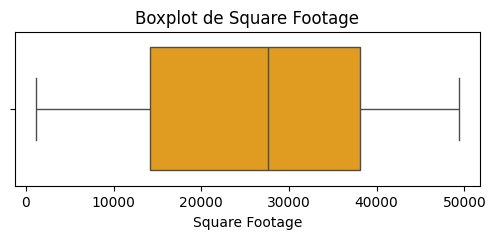

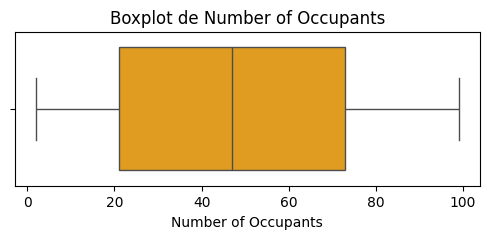

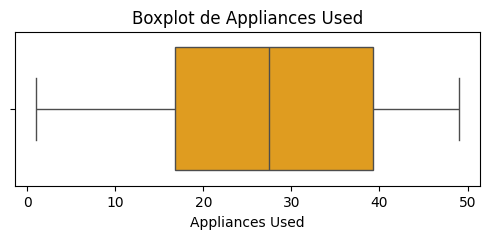

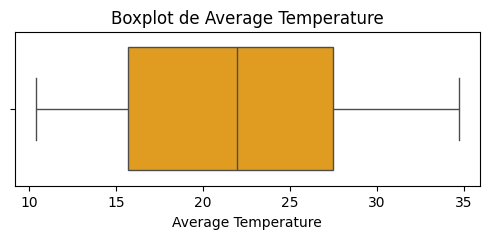

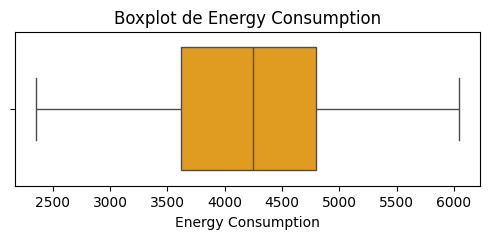

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in df_numeric.columns[:5]:  # exemple : les 5 premières colonnes
    plt.figure(figsize=(6, 2))
    sns.boxplot(data=df_numeric, x=col, color='orange')
    plt.title(f"Boxplot de {col}")
    plt.show()


# OPERATION 7 DECOUPAGE DES DONNEES

## Partie 1 : Séparation Entraînement / Test / Validation
## ➤ 1. Entraînement / Test classique (80% - 20%)

In [ ]:
from sklearn.model_selection import train_test_split
df = pd.read_csv('/home/TP2_IA/test_energy_data.csv')

df_clean = df.dropna()
# Supposons que df_clean est ton DataFrame prétraité final
X = df_clean.drop('Building Type', axis=1)   # Remplace 'target' par la vraie colonne à prédire
y = df_clean['Building Type']

# Split 80% train / 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train set : {X_train.shape}, Test set : {X_test.shape}")


Train set : (80, 6), Test set : (20, 6)


## Entraînement / Validation / Test (60% / 20% / 20%)

In [ ]:
# Première étape : 80% / 20%
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Deuxième étape : on prend les 80% restants et on les divise en train/val
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

print(f"Train : {X_train.shape}, Val : {X_val.shape}, Test : {X_test.shape}")


Train : (60, 6), Val : (20, 6), Test : (20, 6)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

# Encodage des étiquettes cibles (Building Type)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Encodage one-hot pour 'Day of Week'
X = pd.get_dummies(X, columns=['Day of Week'], drop_first=True)

# Nettoyage des valeurs infinies et manquantes
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()
y_encoded = y_encoded[X.index]  # réalignement

# Modèle de classification
model = RandomForestClassifier()

# Validation croisée
scores = cross_val_score(model, X, y_encoded, cv=5, scoring='accuracy')

print("Scores (précision par fold) :", scores)
print("Score moyen :", scores.mean())


Scores (précision par fold) : [0.55 0.4  0.5  0.35 0.55]
Score moyen : 0.4700000000000001
